# Data-Driven Insights on Health and Lifestyle: Analyzing Correlations and Testing Hypotheses

## I. Exploratory Data Analysis (EDA)

In [1083]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1084]:
file_path = './synthetic_health_data.csv'
data = pd.read_csv(file_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
None


In [1085]:
print(data.head())

         Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904948     6.028641   
3  58.276358  21.765316                   2     49.756767     5.802714   
4  37.190160  28.491117                   2     44.218737     7.912548   

   Smoking_Status  Alcohol_Consumption  Health_Score  
0               0             2.834707     70.542122  
1               1             7.199517     57.244637  
2               1             4.097944     96.333722  
3               1             3.649377     61.321783  
4               0             2.839795     67.175894  


In [1086]:
print(data.isnull().sum())

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


In [1087]:
print(data.describe())

               Age          BMI  Exercise_Frequency  Diet_Quality  \
count  1000.000000  1000.000000         1000.000000   1000.000000   
mean     40.231985    25.354181            2.888000     69.952977   
std      11.750591     4.987272            1.995354     14.972061   
min       1.104792    10.298057            0.000000     19.907497   
25%      32.228916    21.968792            1.000000     59.945481   
50%      40.303607    25.315386            3.000000     69.975151   
75%      47.775327    28.644411            5.000000     80.527839   
max      86.232778    40.965538            6.000000    110.265186   

       Sleep_Hours  Smoking_Status  Alcohol_Consumption  Health_Score  
count  1000.000000     1000.000000          1000.000000   1000.000000  
mean      6.973135        0.499000             3.079377     85.479947  
std       1.517218        0.500249             2.084564     13.633845  
min       2.431107        0.000000            -3.592506     29.106017  
25%       5.903351

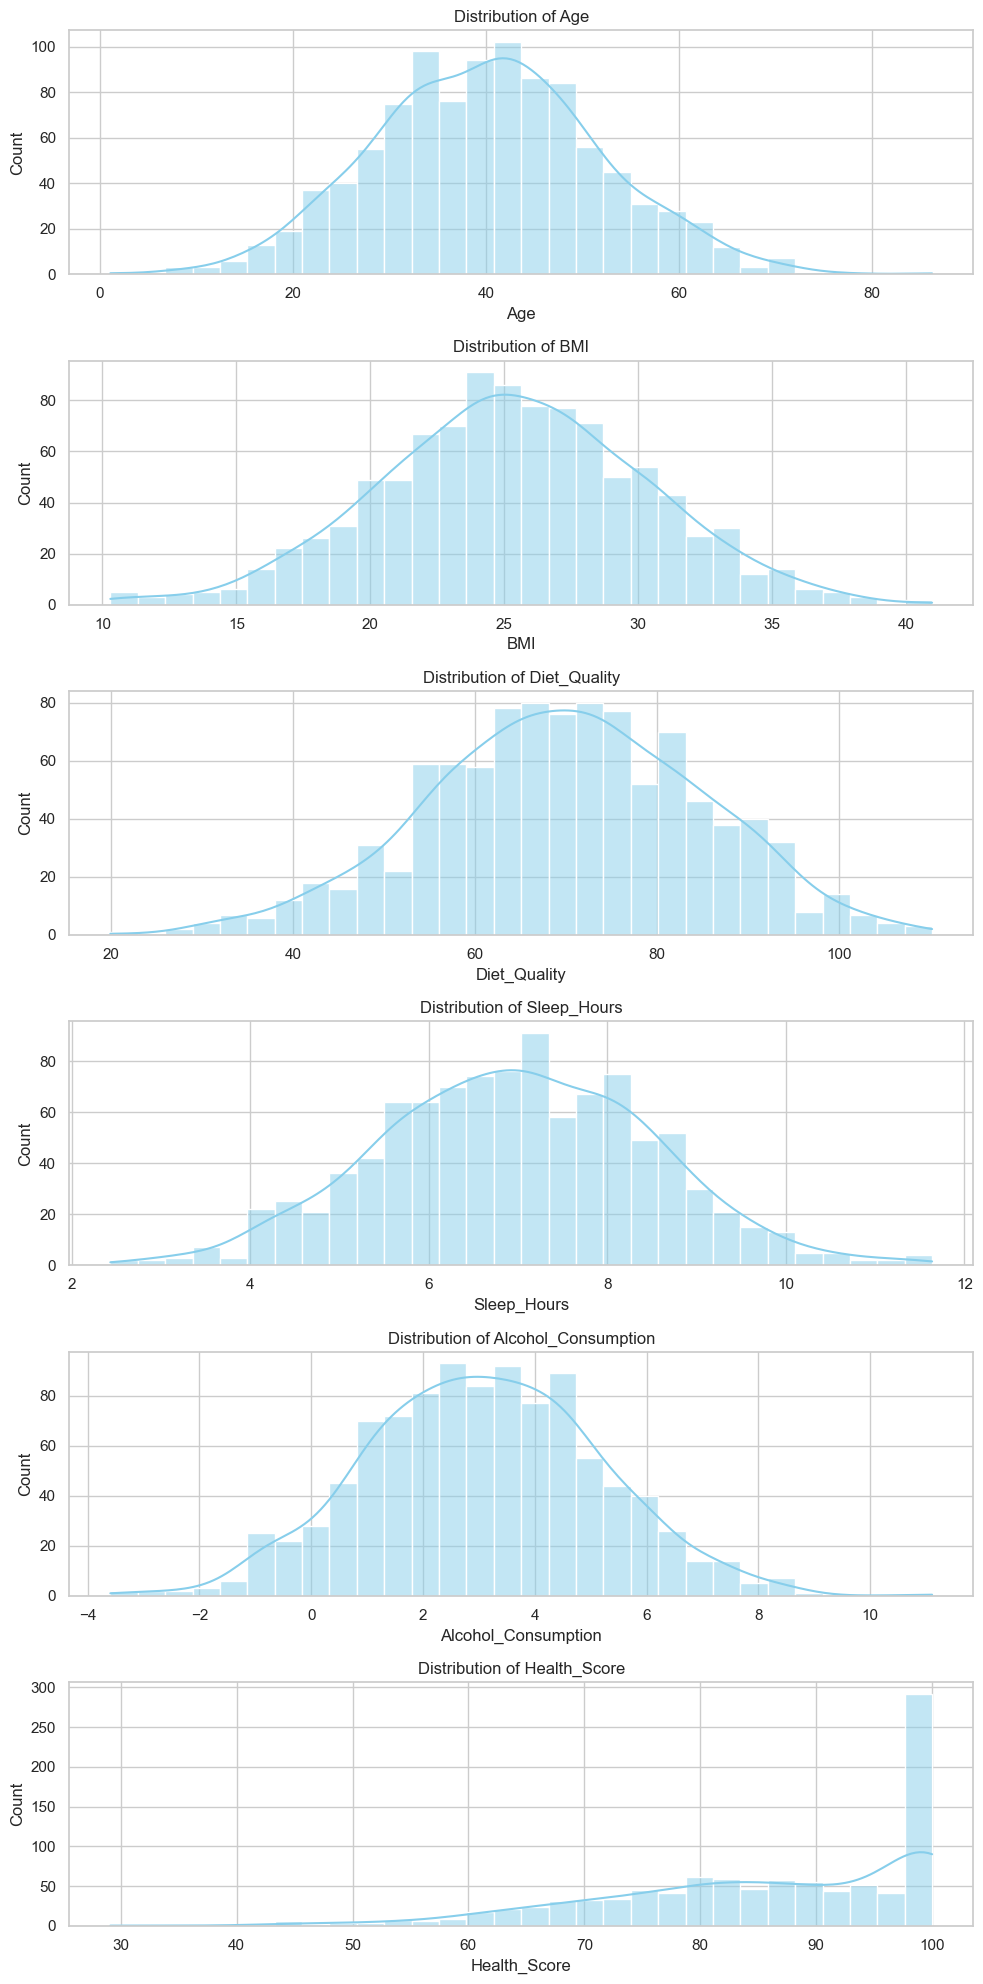

In [1088]:
numeric_columns = ['Age', 'BMI', 'Diet_Quality', 'Sleep_Hours', 'Alcohol_Consumption', 'Health_Score']

# distributions
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30, color="skyblue")
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_74619/564588546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exercise_Frequency", data=data, palette="viridis", ax=ax[0])
/var/folders/m7/2d5d832j3j300wwm7q5ptzdh0000gn/T/ipykernel_74619/564588546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Smoking_Status", data=data, palette="muted", ax=ax[1])


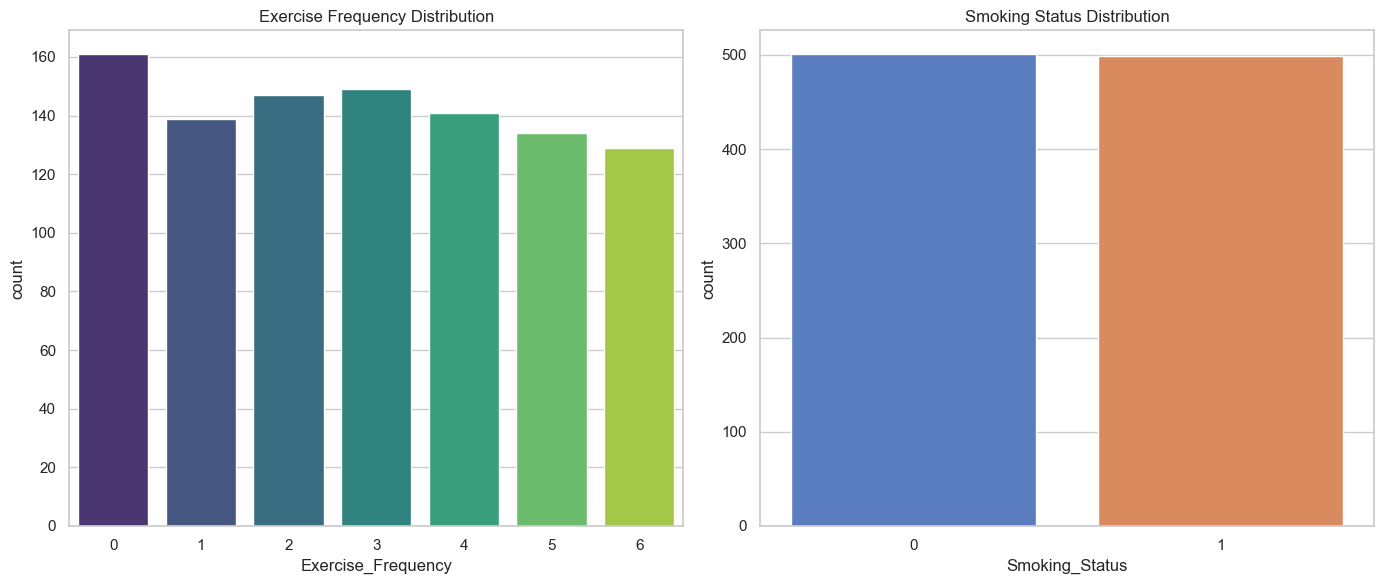

In [1089]:
# category variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x="Exercise_Frequency", data=data, palette="viridis", ax=ax[0])
ax[0].set_title("Exercise Frequency Distribution")
sns.countplot(x="Smoking_Status", data=data, palette="muted", ax=ax[1])
ax[1].set_title("Smoking Status Distribution")
plt.tight_layout()
plt.show()

- Age: Age is distributed over a wide range, but tends to be around 40 years old.
- BMI: Nearly normally distributed.
- Diet_Quality: Diet quality is generally distributed with little bias.
- Sleep_Hours: Sleep hours are concentrated between 5 and 8 hours.
- Alcohol_Consumption: The distribution of alcohol consumption has a slightly longer tail to the right.
- Health_Score: Health scores are concentrated in the high range.


- Exercise_Frequency: Exercise frequency is skewed, with some categories being more prevalent than others.
- Smoking_Status: There is a clear split between smokers and nonsmokers.

## II. Hypothesis Testing:

In [1090]:
def isNullHypothesisRejected(p_value):
    return True if p_value < 0.05 else False


def printConclusion(isNullHypothesisRejected):
    if isNullHypothesisRejected:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

### Hypothesis 1: Smokers tends to have lower Health Score than non-smokers.
- Null Hypothesis (H₀): There is no significant difference in health scores between smokers and nonsmokers.
- Alternative Hypothesis (H₁): Smokers tends to have lower Health Score than non-smokers.

#### Conduct T-Test

In [1091]:
smorkers = data[data["Smoking_Status"] == 1]["Health_Score"]
non_smorkers = data[data["Smoking_Status"] == 0]["Health_Score"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(smorkers, non_smorkers, alternative="less")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
isRejected = isNullHypothesisRejected(p_value)
printConclusion(isRejected)

T-statistic: -3.4680210556941535
P-value: 0.00027334051907737067
Reject the null hypothesis.


**Interpretation**
- **T-statistic**: -3.47 (negative value, suggesting a difference in the health scores of smokers and nonsmokers in the opposite direction).  
- **P-value**: 0.0002 (so small that the null hypothesis is rejected) which means that there is a significant difference in health scores between smokers and nonsmokers.

### Hypothesis 2: The higher the frequency of exercise people have, the higher Health_Score they have.
- Null Hypothesis (H₀): There is no significant difference in Health_Score between groups with different exercise frequency.
- Alternative Hypothesis (H₁): There is a significant difference in Health_Score between groups with different exercise frequency.

#### Conduct ANOVA

In [1092]:
health_score_no_exercise = data[data["Exercise_Frequency"] == 0]["Health_Score"]
health_score_1_2_times = data[(data["Exercise_Frequency"] >= 1) & (data["Exercise_Frequency"] <= 2)]["Health_Score"]
health_score_3_times = data[data["Exercise_Frequency"] >= 3]["Health_Score"]

# ANOVA
f_stat, p_value = stats.f_oneway(health_score_no_exercise, health_score_1_2_times, health_score_3_times)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
isRejected = isNullHypothesisRejected(p_value)
printConclusion(isRejected)

F-statistic: 26.093532003812943
P-value: 9.002272582455893e-12
Reject the null hypothesis.


Here's the interpretation
- **F-statistic**: The value of 26.09 indicates a fairly large difference between the groups.
- **P-value**: Means that there is a statistically significant difference in Health_Score between groups with different exercise frequencies (no exercise, 1-2 times per week, 3 or more times per week).

### Hypothesis 3: People who have higher diet quality tend to have better health score

In [1093]:
low_diet = data[data['Diet_Quality'] <= 33]['Health_Score']
medium_diet = data[(data['Diet_Quality'] > 33) & (data['Diet_Quality'] <= 66)]['Health_Score']
high_diet = data[data['Diet_Quality'] > 66]['Health_Score']

# ANOVA
f_stat, p_value = stats.f_oneway(low_diet, medium_diet, high_diet)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 250.2626555025657
P-value: 8.423875034328269e-89


Here's the interpretation
- **F-statistic**: The value of 250.26 indicates a fairly large difference between the groups.
- **P-value**: Means that there is a statistically significant difference in Health_Score between groups with different diet quality.

## III. Correlation Testing:

### 1. Is there a Point-Biserial correlation between Smoking_Status and Health_Score?

#### Point-Biserial Correlation

In [1094]:
# Point-Biserial Correlation
corr, p_value = stats.pointbiserialr(data['Smoking_Status'], data['Health_Score'])
print(f"Point-Biserial Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Point-Biserial Correlation: -0.109, p-value: 0.001


#### Visualization:

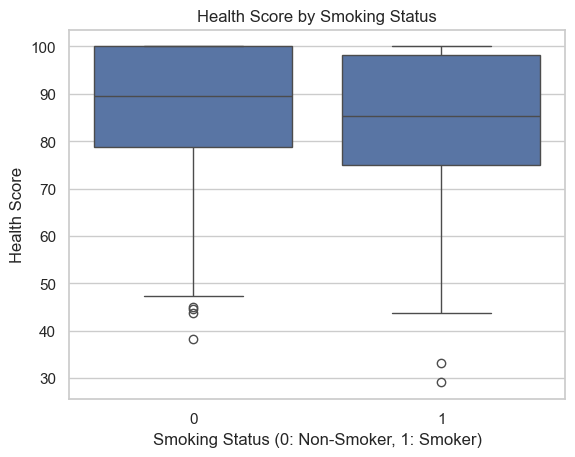

In [1095]:
sns.boxplot(x='Smoking_Status', y='Health_Score', data=data)
plt.title('Health Score by Smoking Status')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Health Score')
plt.show()

**Interpretation**
- **Point-Biserial Correlation**: a very small negative value, suggesting a difference in the health scores of smokers and nonsmokers in the opposite direction. 
- **P-value**: Means that there is a significant difference in health scores between smokers and nonsmokers.

### 2. Is there a Pearson correlation between BMI and Health Score?

#### Pearson correlation

In [1096]:
# Pearson
corr, p_value = stats.pearsonr(data['BMI'], data['Health_Score'])

print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: -0.4151469156979911
P-value: 6.142024594815526e-43


Here's the interpretation
- **Pearson correlation**: -0.415 means there is a negative correlation between BMI and Health_Score.
- **P-value**: The result indicates there is a significant correlation between BMI and Health_Score.

#### Visualization

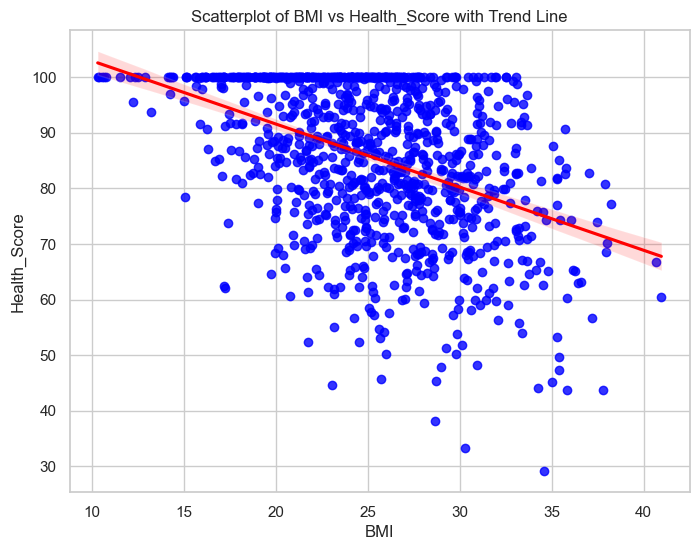

In [1097]:
plt.figure(figsize=(8, 6))
sns.regplot(x='BMI', y='Health_Score', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('BMI')
plt.ylabel('Health_Score')
plt.title('Scatterplot of BMI vs Health_Score with Trend Line')
plt.show()

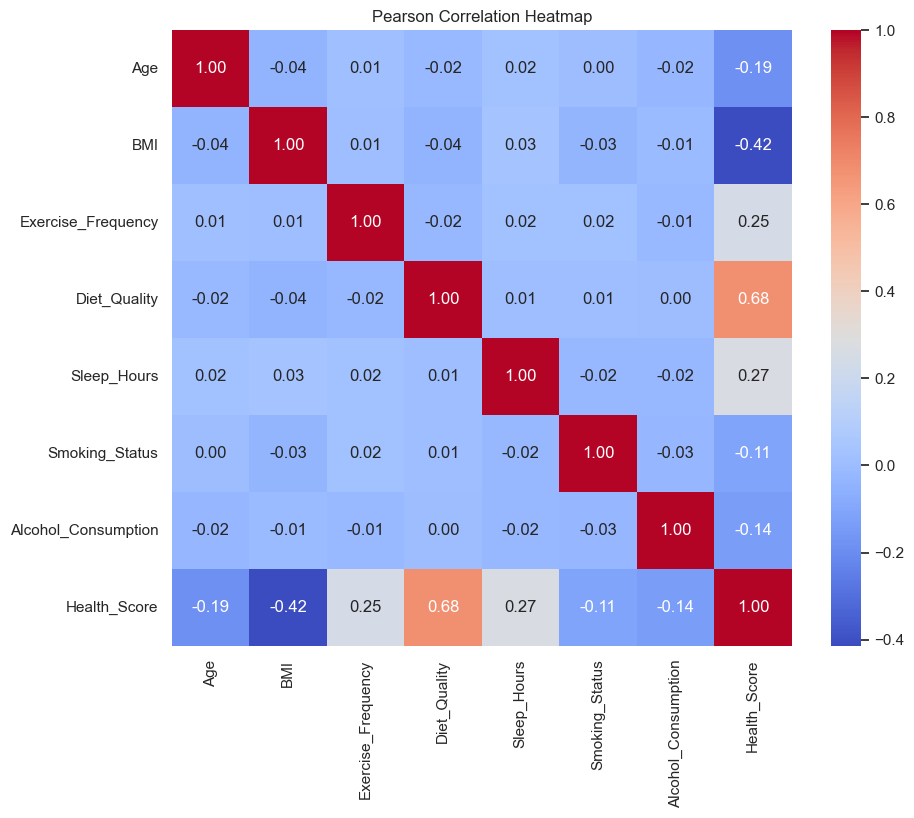

In [1098]:
# Compute the Pearson correlation matrix
pearson_corr = data.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

### 3. Is there a Spearman correlation between Sleep Hours and Health Score?

#### Spearman correlation

In [1099]:
# Spearman
corr, p_value = stats.spearmanr(data['Sleep_Hours'], data['Health_Score'])

print(f"Spearman correlation: {corr}")
print(f"P-value: {p_value}")

Spearman correlation: 0.24185977163950992
P-value: 8.896131485042629e-15


Here's the interpretation
- **Spearman correlation**: 0.2418 indicates little correlation (weak positive correlation) between sleep hours and health score.
- **P-value**: Rejected the null hypothesis(no correlation) , meaning that there is a statistically significant correlation.

#### Visualization

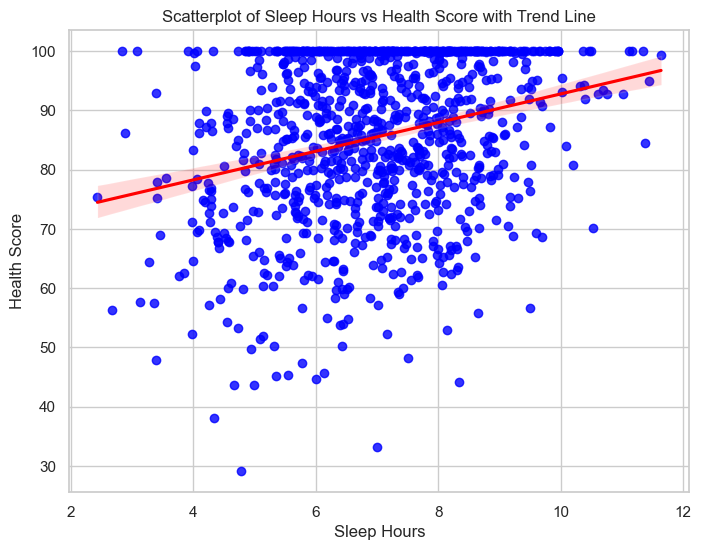

In [1100]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Sleep_Hours', y='Health_Score', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Sleep Hours')
plt.ylabel('Health Score')
plt.title('Scatterplot of Sleep Hours vs Health Score with Trend Line')
plt.show()

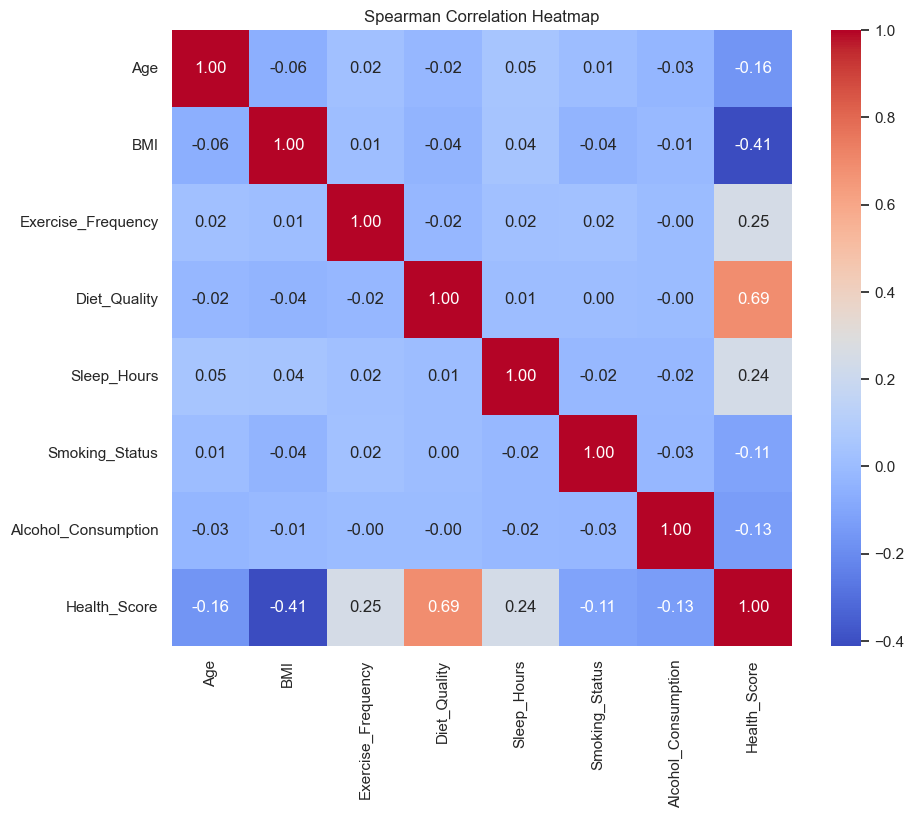

In [1101]:
# Compute the Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

### 4. Look for relationships between Alcohol Consumption and Health Score.

### Kendall's Tau

In [1102]:
# Alcohol_ConsumptionとHealth_ScoreのKendall's Tau
tau, p_value = stats.kendalltau(data['Alcohol_Consumption'], data['Health_Score'])

print(f"Kendall's Tau: {tau}")
print(f"P-value: {p_value}")

Kendall's Tau: -0.08934387834648168
P-value: 3.5535361286430465e-05


Here's the interpretation
- **Kendall's Tau**: -0.0893 indicates little correlation (weak negative correlation) between alcohol consumption and health score.
- **P-value**: Means that there is a statistically significant correlation.

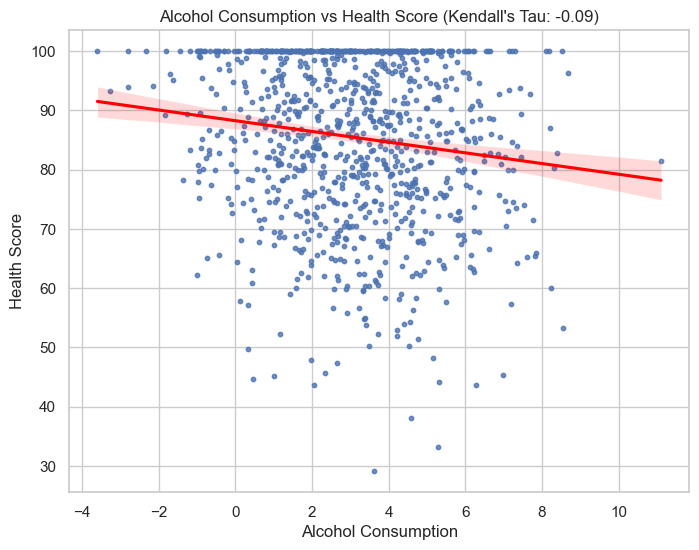

In [1103]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Alcohol_Consumption', y='Health_Score', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Alcohol Consumption vs Health Score (Kendall\'s Tau: {:.2f})'.format(tau))
plt.xlabel('Alcohol Consumption')
plt.ylabel('Health Score')
plt.show()

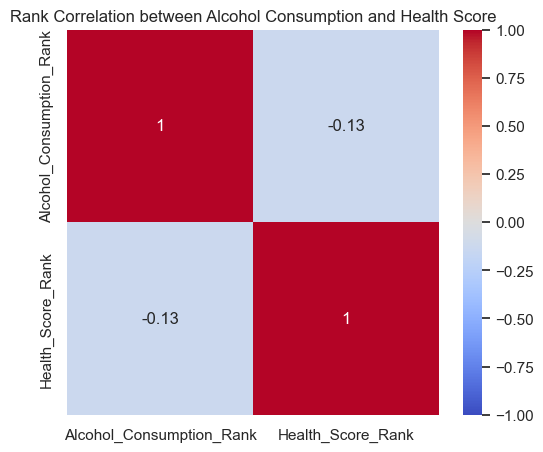

In [1104]:
data['Alcohol_Consumption_Rank'] = data['Alcohol_Consumption'].rank()
data['Health_Score_Rank'] = data['Health_Score'].rank()

correlation_matrix = data[['Alcohol_Consumption_Rank', 'Health_Score_Rank']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Rank Correlation between Alcohol Consumption and Health Score')
plt.show()


### 5. Look for relationships between Exercise Frequency and Health Score

#### Phi coefficient

In [1105]:
mean_exercise_frequency = data['Exercise_Frequency'].mean()
data['Exercise_Frequency_Binary'] = (data['Exercise_Frequency'] > mean_exercise_frequency).astype(int)

mean_health_score = data['Health_Score'].mean()
data['Health_Score_Binary'] = (data['Health_Score'] > mean_health_score).astype(int)

contingency_table = pd.crosstab(data['Exercise_Frequency_Binary'], data['Health_Score_Binary'])

# Phi coefficient
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
phi = (chi2 / data.shape[0]) ** 0.5

print(f"Phi coefficient: {phi}")
print(f"P-value: {p_value}")


Phi coefficient: 0.1517428139157172
P-value: 1.5983508417424298e-06


Here's the interpretation
- **Phi coefficient**: 0.1517 means there is a positive correlation between Exercise_Frequency_Binary and Health_Score_Binary.
- **P-value**: The result indicates there is a significant correlation between Exercise_Frequency_Binary and Health_Score_Binary.

#### Visualization

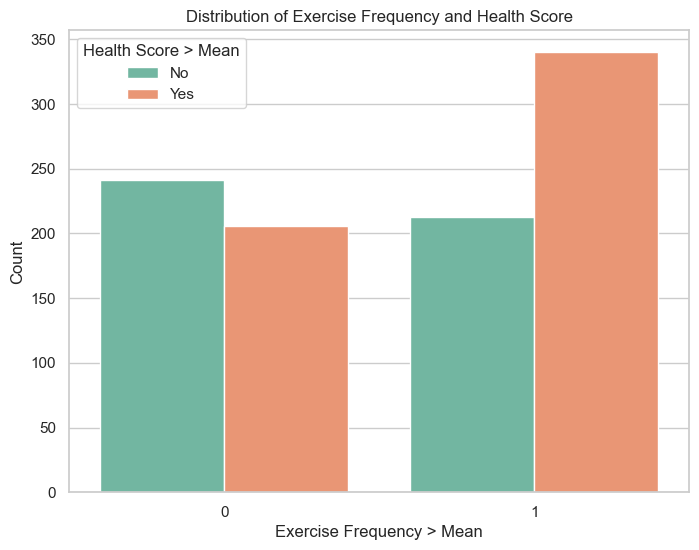

In [1106]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise_Frequency_Binary', hue='Health_Score_Binary', data=data, palette='Set2')
plt.title('Distribution of Exercise Frequency and Health Score')
plt.xlabel('Exercise Frequency > Mean')
plt.ylabel('Count')
plt.legend(title='Health Score > Mean', labels=['No', 'Yes'])
plt.show()

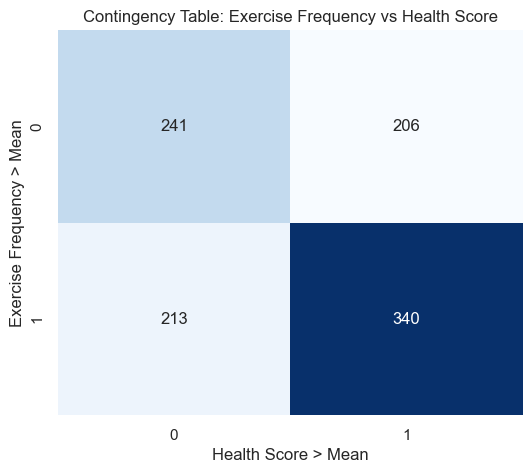

In [1107]:
contingency_table = pd.crosstab(data['Exercise_Frequency_Binary'], data['Health_Score_Binary'])

plt.figure(figsize=(6, 5))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Contingency Table: Exercise Frequency vs Health Score')
plt.xlabel('Health Score > Mean')
plt.ylabel('Exercise Frequency > Mean')
plt.show()

## IV. Interpretation & Real-World Application:

### Insights into the Data

#### Hypothesis Testing

##### Hypothesis 1: Smokers tends to have lower Health Score than non-smokers:
- The data supports the notion that smoking has a measurable negative impact on health, as smokers tend to have lower health scores compared to non-smokers. This could suggest that smoking is associated with poorer health outcomes, which is consistent with public health knowledge. This finding can inform health policies by reinforcing the importance of smoking cessation programs and promoting healthier lifestyle choices.

##### Hypothesis 2: The higher the frequency of exercise people have, the higher Health Score they have:
- Higher exercise frequency is associated with better health scores, supporting the idea that regular physical activity positively impacts overall health. This aligns with real-world evidence that exercise contributes to better physical and mental well-being.

##### Hypothesis 3: People who have higher diet quality tend to have better health score:
- Higher diet quality is associated with better health scores, meaning that the habit of having a good quality diet positively influences overall health.

#### Correlation Testing

#### 1. Is there a Point-Biserial correlation between Smoking_Status and Health_Score?
- This supports the widely established understanding that smoking negatively impacts overall health. This finding has important implications for public health initiatives. Smoking cessation programs can be reinforced with the evidence that smoking directly affects health scores and overall well-being.

##### 2. Is there a Pearson correlation between BMI and Health_Score?:
- This highlights the importance of maintaining a healthy weight for overall health. In practice, this could inform health initiatives promoting weight management as part of broader wellness programs.

##### 3. Is there a Spearman correlation between sleep hours and health score?:
- The positive correlation, though weak, suggests that individuals who get more sleep may have slightly higher health scores. While the relationship is not strong, this finding is consistent with existing research indicating that adequate sleep can have a positive effect on health. However, given the weak correlation, it would be important to focus on sleep as just one factor in a broader set of health behaviors.

#### 4. Look for relationships between Alcohol Consumption and Health Score.
- This suggests that higher alcohol consumption may be associated with poorer health outcomes. Real-world applications could involve campaigns focusing on the health risks of excessive alcohol consumption, encouraging moderation to improve long-term health.

#### 5. Look for relationships between Exercise Frequency and Health Score
- The same as Hypothesis 2.


The insights gained from this analysis can be applied to public health initiatives aimed at improving lifestyle factors. For example:

- Health programs could emphasize the importance of regular exercise and healthy weight maintenance.
- Public health campaigns could target alcohol moderation to reduce health risks.
- Interventions promoting better diet quality could be introduced to improve overall well-being.

In summary, the data highlights key lifestyle factors—exercise, alcohol consumption, and BMI—that significantly influence health, providing valuable information for designing effective health interventions.